.ipynb settings

In [1]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

In [2]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions

Importation of the dataset(s)

In [3]:
#Importing dataset(s)
from data import make_dataset

#Load the feat_engineered_ds:
feat_engineered_ds=make_dataset.load_data(True, 'interim/feat_engineered_ds')

The interim/feat_engineered_ds dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]




# III) <u>First features selection </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Making out a min Game Week value overwhich data is reliable and stable

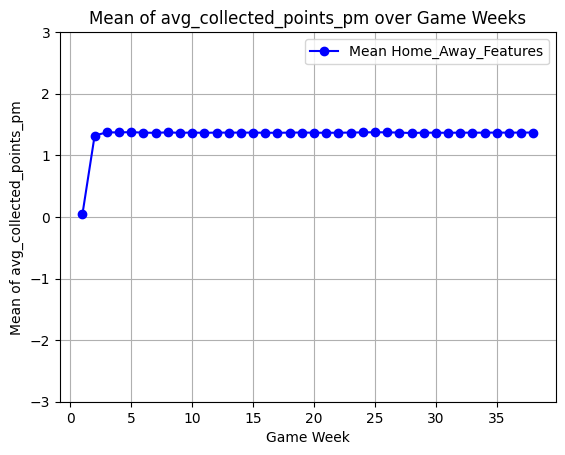

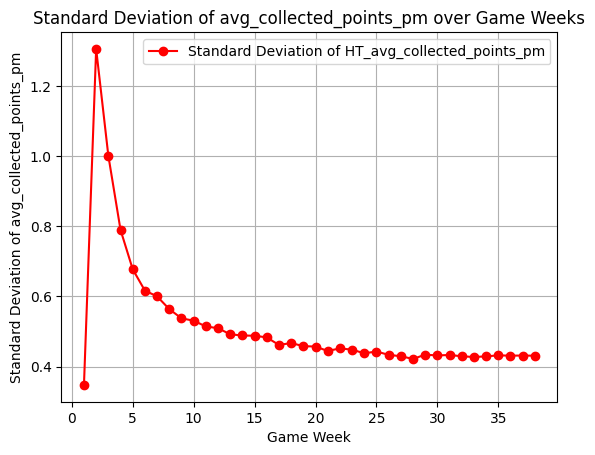

In [4]:
#src.features.features_selection
#Plot a specific feature avg over Game Weeks


from features import features_selection


#Plot the graphs
features_selection.plot_feature_stats_over_game_weeks("HT_avg_collected_points_pm", "AT_avg_collected_points_pm", feat_engineered_ds.copy())


<span style="color:#FF1493;"> <strong> <font size="4">2) Evaluating features relevancy by computing their correlation with matchs results

In [5]:
#src.features.features_selection


from features import features_selection
import pandas as pd

#Analysis of a specific feature correlation with matchs' results
"""
features_selection.feature_correlation_with_results_analysis("Diff_HT_goal_diff_pm", "Diff_AT_goal_diff_pm", 999, 7, pd.to_datetime("07/15/2014"), last_dataset_xx.copy())
"""


#Ranking of several features correlations with matchs' results
HT_features_to_rank = ["Diff_pnt_HT_ratio",
                        "HT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_HT_ranking",
                        "Diff_HT_avg_scored_g_conceded_g_ratio",
                        "Diff_HT_annual_budget",
                        "Diff_HT_avg_victory_pm",
                        "Diff_HT_goal_diff_pm",
                        "HT_Diff_avg_corners_nb",
                        "HT_Diff_avg_shots_nb",
                        "HT_Diff_avg_shots_on_target_nb",
                        "HT_Diff_Points_5lm",
                        'Diff_HT_ranking_5lm',
                        "HT_Diff_Goal_Diff_5lm", 
                        "HT_Diff_avg_fouls_nb",
                        "HT_Diff_avg_possession", 
                        "HT_Diff_avg_xg",
                        "HT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Home)",
                        "HT_avg_collected_points_pm",
                        "odds_ft_home_team_win",
                        "HT_H_A_status",
                        "HT_Diff_Points_3lm",
                        "HT_Diff_Goal_Diff_3lm",
                        "HT_Diff_Points_1lm",
                        "HT_Diff_Goal_Diff_1lm"]                                                  
AT_features_to_rank = ["Diff_pnt_AT_ratio",
                        "AT_Diff_points_ponderated_by_adversary_perf",
                        "Diff_AT_ranking",
                        "Diff_AT_avg_scored_g_conceded_g_ratio",
                        "Diff_AT_annual_budget",
                        "Diff_AT_avg_victory_pm",
                        "Diff_AT_goal_diff_pm",
                        "AT_Diff_avg_corners_nb",
                        "AT_Diff_avg_shots_nb",
                        "AT_Diff_avg_shots_on_target_nb",
                        "AT_Diff_Points_5lm",
                        'Diff_AT_ranking_5lm',
                        "AT_Diff_Goal_Diff_5lm", 
                        "AT_Diff_avg_fouls_nb",
                        "AT_Diff_avg_possession",
                        "AT_Diff_avg_xg",
                        "AT_Diff_avg_odds_victory_proba",
                        "Pre-Match PPG (Away)",
                        "AT_avg_collected_points_pm",
                        "odds_ft_away_team_win",
                        "AT_H_A_status",
                        "AT_Diff_Points_3lm",
                        "AT_Diff_Goal_Diff_3lm",
                        "AT_Diff_Points_1lm",
                        "AT_Diff_Goal_Diff_1lm"]

#Biserial Point correlation calculation (personnal function)
graph_biserial_point = features_selection.ranking_features_correlation_with_result( HT_features_to_rank, AT_features_to_rank,50, 7, pd.to_datetime("07/15/2017"), feat_engineered_ds.copy())

#f_classif correlation
graph_f_classif = features_selection.ranking_features_f_classif(HT_features_to_rank, AT_features_to_rank, 7, pd.to_datetime("07/15/2017"), feat_engineered_ds.copy())


display(graph_f_classif)

display(graph_biserial_point)


,Feature,f_classif correlation,Feature mean for R = 1,Feature mean for R = 0,p value,Ecart relatif entre les feature mean for R = 0 ou 1
16,HT_Diff_avg_odds_victory_proba,475.336544,0.077525,-0.045632,1.5e-99,1.588618
6,Diff_HT_goal_diff_pm,379.804988,0.403924,-0.237757,8.4e-81,1.588618
15,HT_Diff_avg_xg,363.333776,0.109919,-0.064700,1.6e-77,1.588618
14,HT_Diff_avg_possession,353.482891,3.026383,-1.781383,1.5e-75,1.588618
1,HT_Diff_points_ponderated_by_adversary_perf,330.648408,0.335576,-0.197526,5.5e-71,1.588618
0,Diff_pnt_HT_ratio,329.854818,0.249462,-0.146838,7.9e-71,1.588618
8,HT_Diff_avg_shots_nb,327.176316,0.955842,-0.562626,2.7e-70,1.588618
5,Diff_HT_avg_victory_pm,309.116575,0.087444,-0.051471,1.2e-66,1.588618
19,odds_ft_home_team_win,306.951590,2.530856,4.006232,3.2e-66,0.582955
2,Diff_HT_ranking,300.769333,0.142081,-0.083631,5.7e-65,1.588618


,Feature,Correlation,Feature mean for R = 1,Feature mean for R = 0,p value,Ecart relatif entre les feature mean for R = 0 ou 1
16,HT_Diff_avg_odds_victory_proba,0.329380,0.077525,-0.045632,1.5e-99,1.588618
6,Diff_HT_goal_diff_pm,0.297690,0.403924,-0.237757,8.4e-81,1.588618
15,HT_Diff_avg_xg,0.291724,0.109919,-0.064700,1.6e-77,1.588618
14,HT_Diff_avg_possession,0.288075,3.026383,-1.781383,1.5e-75,1.588618
1,HT_Diff_points_ponderated_by_adversary_perf,0.279365,0.335576,-0.197526,5.5e-71,1.588618
0,Diff_pnt_HT_ratio,0.279056,0.249462,-0.146838,7.9e-71,1.588618
8,HT_Diff_avg_shots_nb,0.278008,0.955842,-0.562626,2.7e-70,1.588618
5,Diff_HT_avg_victory_pm,0.270805,0.087444,-0.051471,1.2e-66,1.588618
19,odds_ft_home_team_win,0.269924,2.530856,4.006232,3.2e-66,0.582955
2,Diff_HT_ranking,0.267388,0.142081,-0.083631,5.7e-65,1.588618


<span style="color:#FF1493;"> <strong> <font size="4">3) Definition of restricted datasets with a selection of relevant features<font color="red">

In [6]:
#src.features.features_selection

#On créé des dataframes en concaténant les HT et AT col et qui contiennent moins de features. On met aussi un filtre sur le nb de matchs min joués. Easier to study feature per feature
dataset_restricted_2, dataset_restricted_3 = features_selection.restricted_datasets(feat_engineered_ds.copy())


# IV) <u> Data exploration </u>

<span style="color:#FF1493;"> <strong> <font size="4">1) Commun statistics

In [7]:
import pandas as pd
#Displaying data type:
feat_engineered_ds.copy().info()

#reglage du nombre maximum de colonnes et de lignes affichés par pandas (required to display the table below)
pd.options.display.max_rows=40000
pd.options.display.max_columns=5000

#Showing basic statistics:
print("\n \n Here are some basic statistics about the dataset features:")
feat_engineered_ds.copy().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Columns: 203 entries, timestamp to D_avg_odd
dtypes: datetime64[ns](1), float64(103), int32(2), int64(90), object(7)
memory usage: 5.4+ MB

 
 Here are some basic statistics about the dataset features:


,timestamp,date_GMT,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,RH,RA,HT_H_A_status,AT_H_A_status,Season_year,HT_played_matchs_nb,AT_played_matchs_nb,HT_victories_nb,AT_victories_nb,HT_avg_victory_pm,AT_avg_victory_pm,Diff_HT_avg_victory_pm,Diff_AT_avg_victory_pm,HT_points_ponderated_by_adversary_perf,AT_points_ponderated_by_adversary_perf,HT_avg_pm_points_ponderated_by_adversary_perf,AT_avg_pm_points_ponderated_by_adversary_perf,HT_Diff_points_ponderated_by_adversary_perf,AT_Diff_points_ponderated_by_adversary_perf,scored_goals_HT_PM,conceded_goals_HT_PM,scored_goals_AT_PM,conceded_goals_AT_PM,goal_diff_HT_PM,goal_diff_AT_PM,HT_avg_goal_diff_pm,AT_avg_goal_diff_pm,Diff_HT_goal_diff_pm,Diff_AT_goal_diff_pm,HT_avg_scored_g_conceded_g_ratio,AT_avg_scored_g_conceded_g_ratio,Diff_HT_avg_scored_g_conceded_g_ratio,Diff_AT_avg_scored_g_conceded_g_ratio,Prematch_HT_PN,Prematch_AT_PN,HT_avg_collected_points_pm,AT_avg_collected_points_pm,Diff_pnt_HT_ratio,Diff_pnt_AT_ratio,HT_week_ranking,AT_week_ranking,Diff_HT_ranking,Diff_AT_ranking,annual budget of HT,annual budget of AT,Diff_HT_annual_budget,Diff_AT_annual_budget,Points_HT_5lm_PM,Points_AT_5lm_PM,Points_HT_3lm_PM,Points_AT_3lm_PM,Points_HT_1lm_PM,Points_AT_1lm_PM,HT_Diff_Points_5lm,AT_Diff_Points_5lm,HT_Diff_Points_3lm,AT_Diff_Points_3lm,HT_Diff_Points_1lm,AT_Diff_Points_1lm,GoalDiff_HT_5lm_PM,GoalDiff_AT_5lm_PM,GoalDiff_HT_3lm_PM,GoalDiff_AT_3lm_PM,GoalDiff_HT_1lm_PM,GoalDiff_AT_1lm_PM,HT_Diff_Goal_Diff_5lm,AT_Diff_Goal_Diff_5lm,HT_Diff_Goal_Diff_3lm,AT_Diff_Goal_Diff_3lm,HT_Diff_Goal_Diff_1lm,AT_Diff_Goal_Diff_1lm,HT_5lm_week_ranking,AT_5lm_week_ranking,HT_3lm_week_ranking,AT_3lm_week_ranking,HT_1lm_week_ranking,AT_1lm_week_ranking,Diff_HT_ranking_5lm,Diff_AT_ranking_5lm,Diff_HT_ranking_3lm,Diff_AT_ranking_3lm,Diff_HT_ranking_1lm,Diff_AT_ranking_1lm,HT_corners_nb,AT_corners_nb,HT_Diff_avg_corners_nb,AT_Diff_avg_corners_nb,HT_yellow_cards_nb,AT_yellow_cards_nb,HT_red_cards_nb,AT_red_cards_nb,HT_Diff_avg_yellow_cards_nb,AT_Diff_avg_yellow_cards_nb,HT_Diff_avg_red_cards_nb,AT_Diff_avg_red_cards_nb,HT_shots_nb,AT_shots_nb,HT_avg_shots_nb,AT_avg_shots_nb,HT_Diff_avg_shots_nb,AT_Diff_avg_shots_nb,HT_shots_on_target_nb,AT_shots_on_target_nb,HT_avg_shots_on_target_nb,AT_avg_shots_on_target_nb,HT_Diff_avg_shots_on_target_nb,AT_Diff_avg_shots_on_target_nb,HT_fouls_nb,AT_fouls_nb,HT_avg_fouls_nb,AT_avg_fouls_nb,HT_Diff_avg_fouls_nb,AT_Diff_avg_fouls_nb,HT_possession,AT_possession,HT_avg_possession,AT_avg_possession,HT_Diff_avg_possession,AT_Diff_avg_possession,HT_xg,AT_xg,HT_avg_xg,AT_avg_xg,HT_Diff_avg_xg,AT_Diff_avg_xg,HT_odds_victory_proba,AT_odds_victory_proba,HT_avg_odds_victory_proba,AT_avg_odds_victory_proba,HT_Diff_avg_odds_victory_proba,AT_Diff_avg_odds_victory_proba,HTW_Max

<span style="color:#FF1493;"> <strong> <font size="4">2) Box Plot

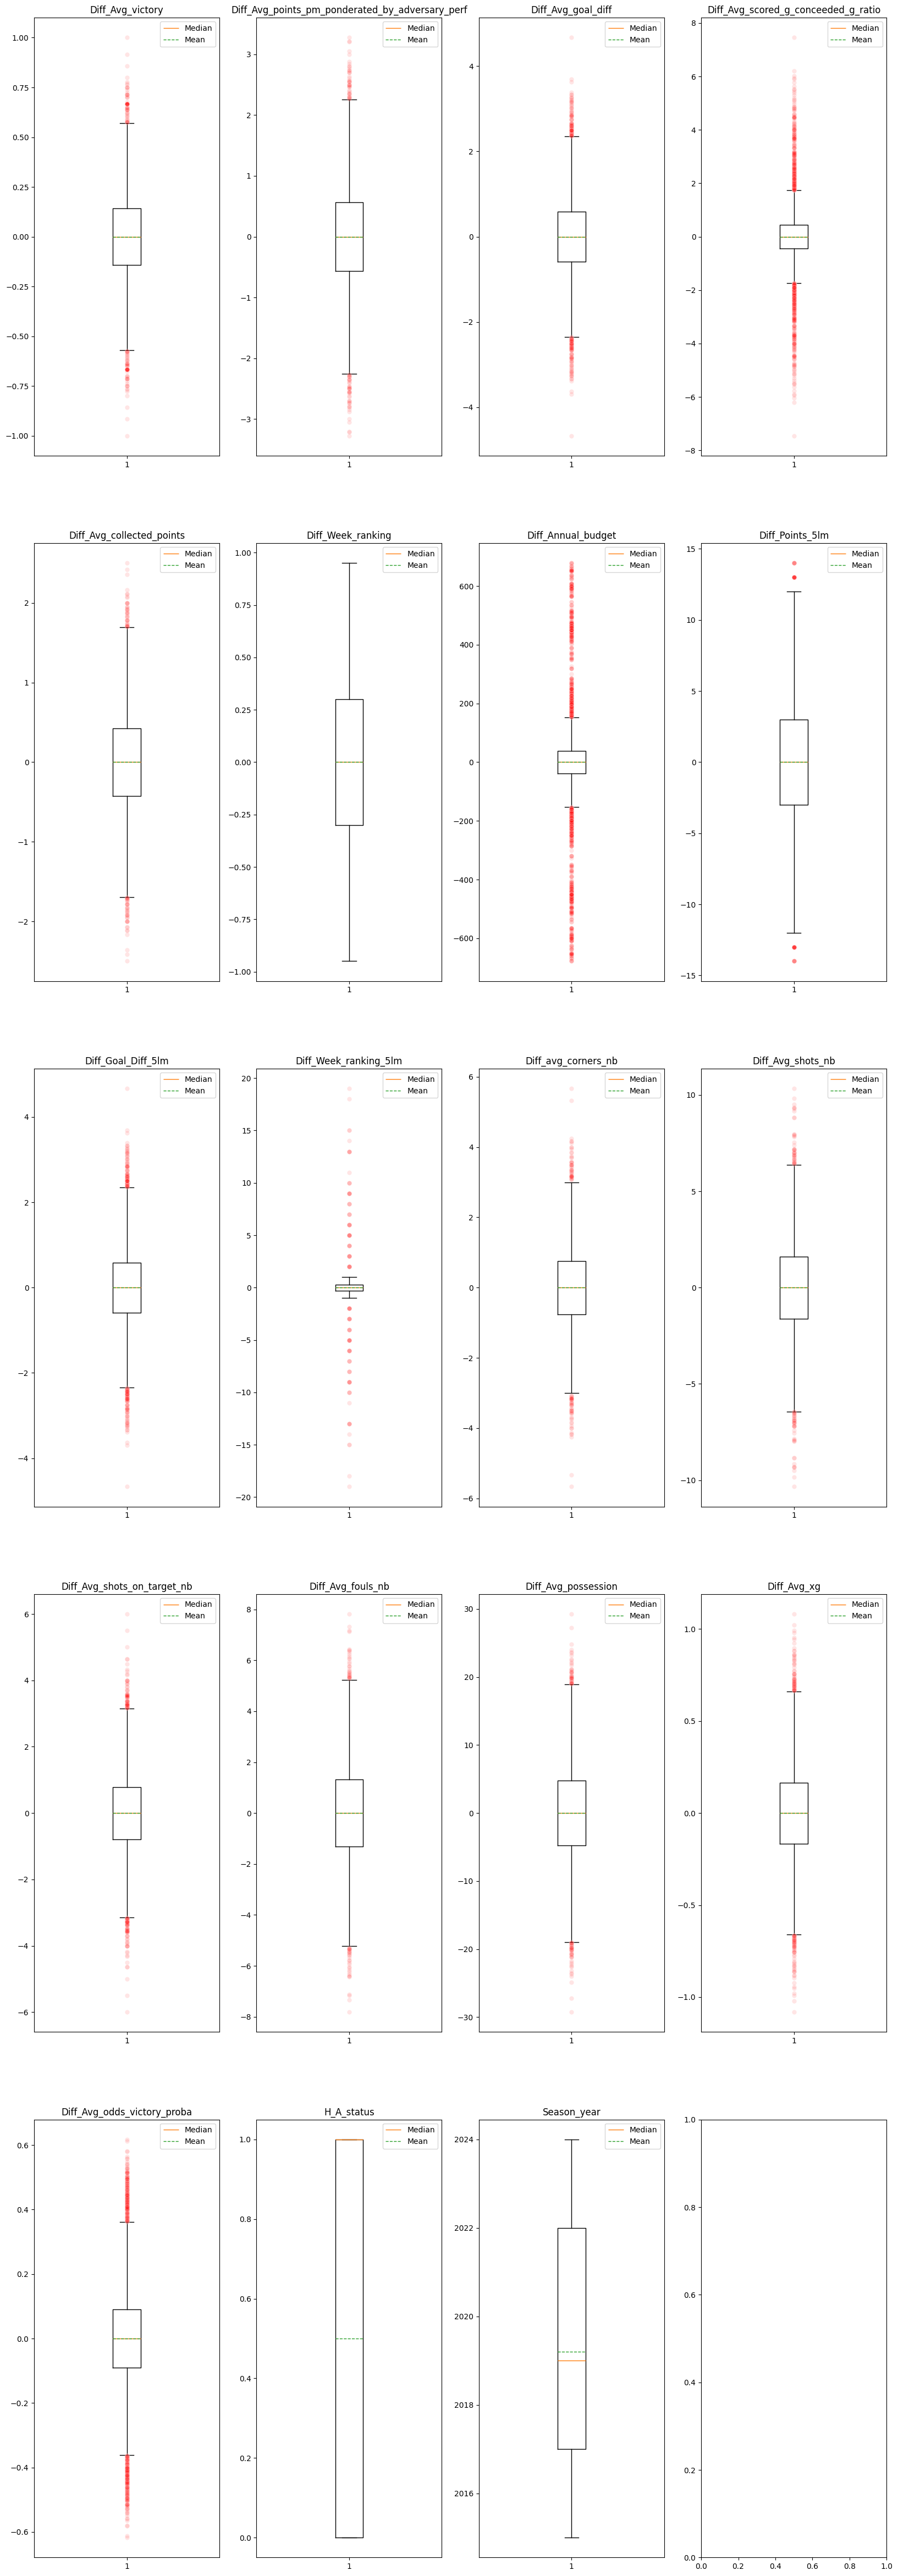

In [8]:
#src.visualization.visualize
from visualization import visualize
visualize.boxplot(dataset_restricted_2.copy())

<span style="color:#FF1493;"> <strong> <font size="4">3) Feature correlation heatmap

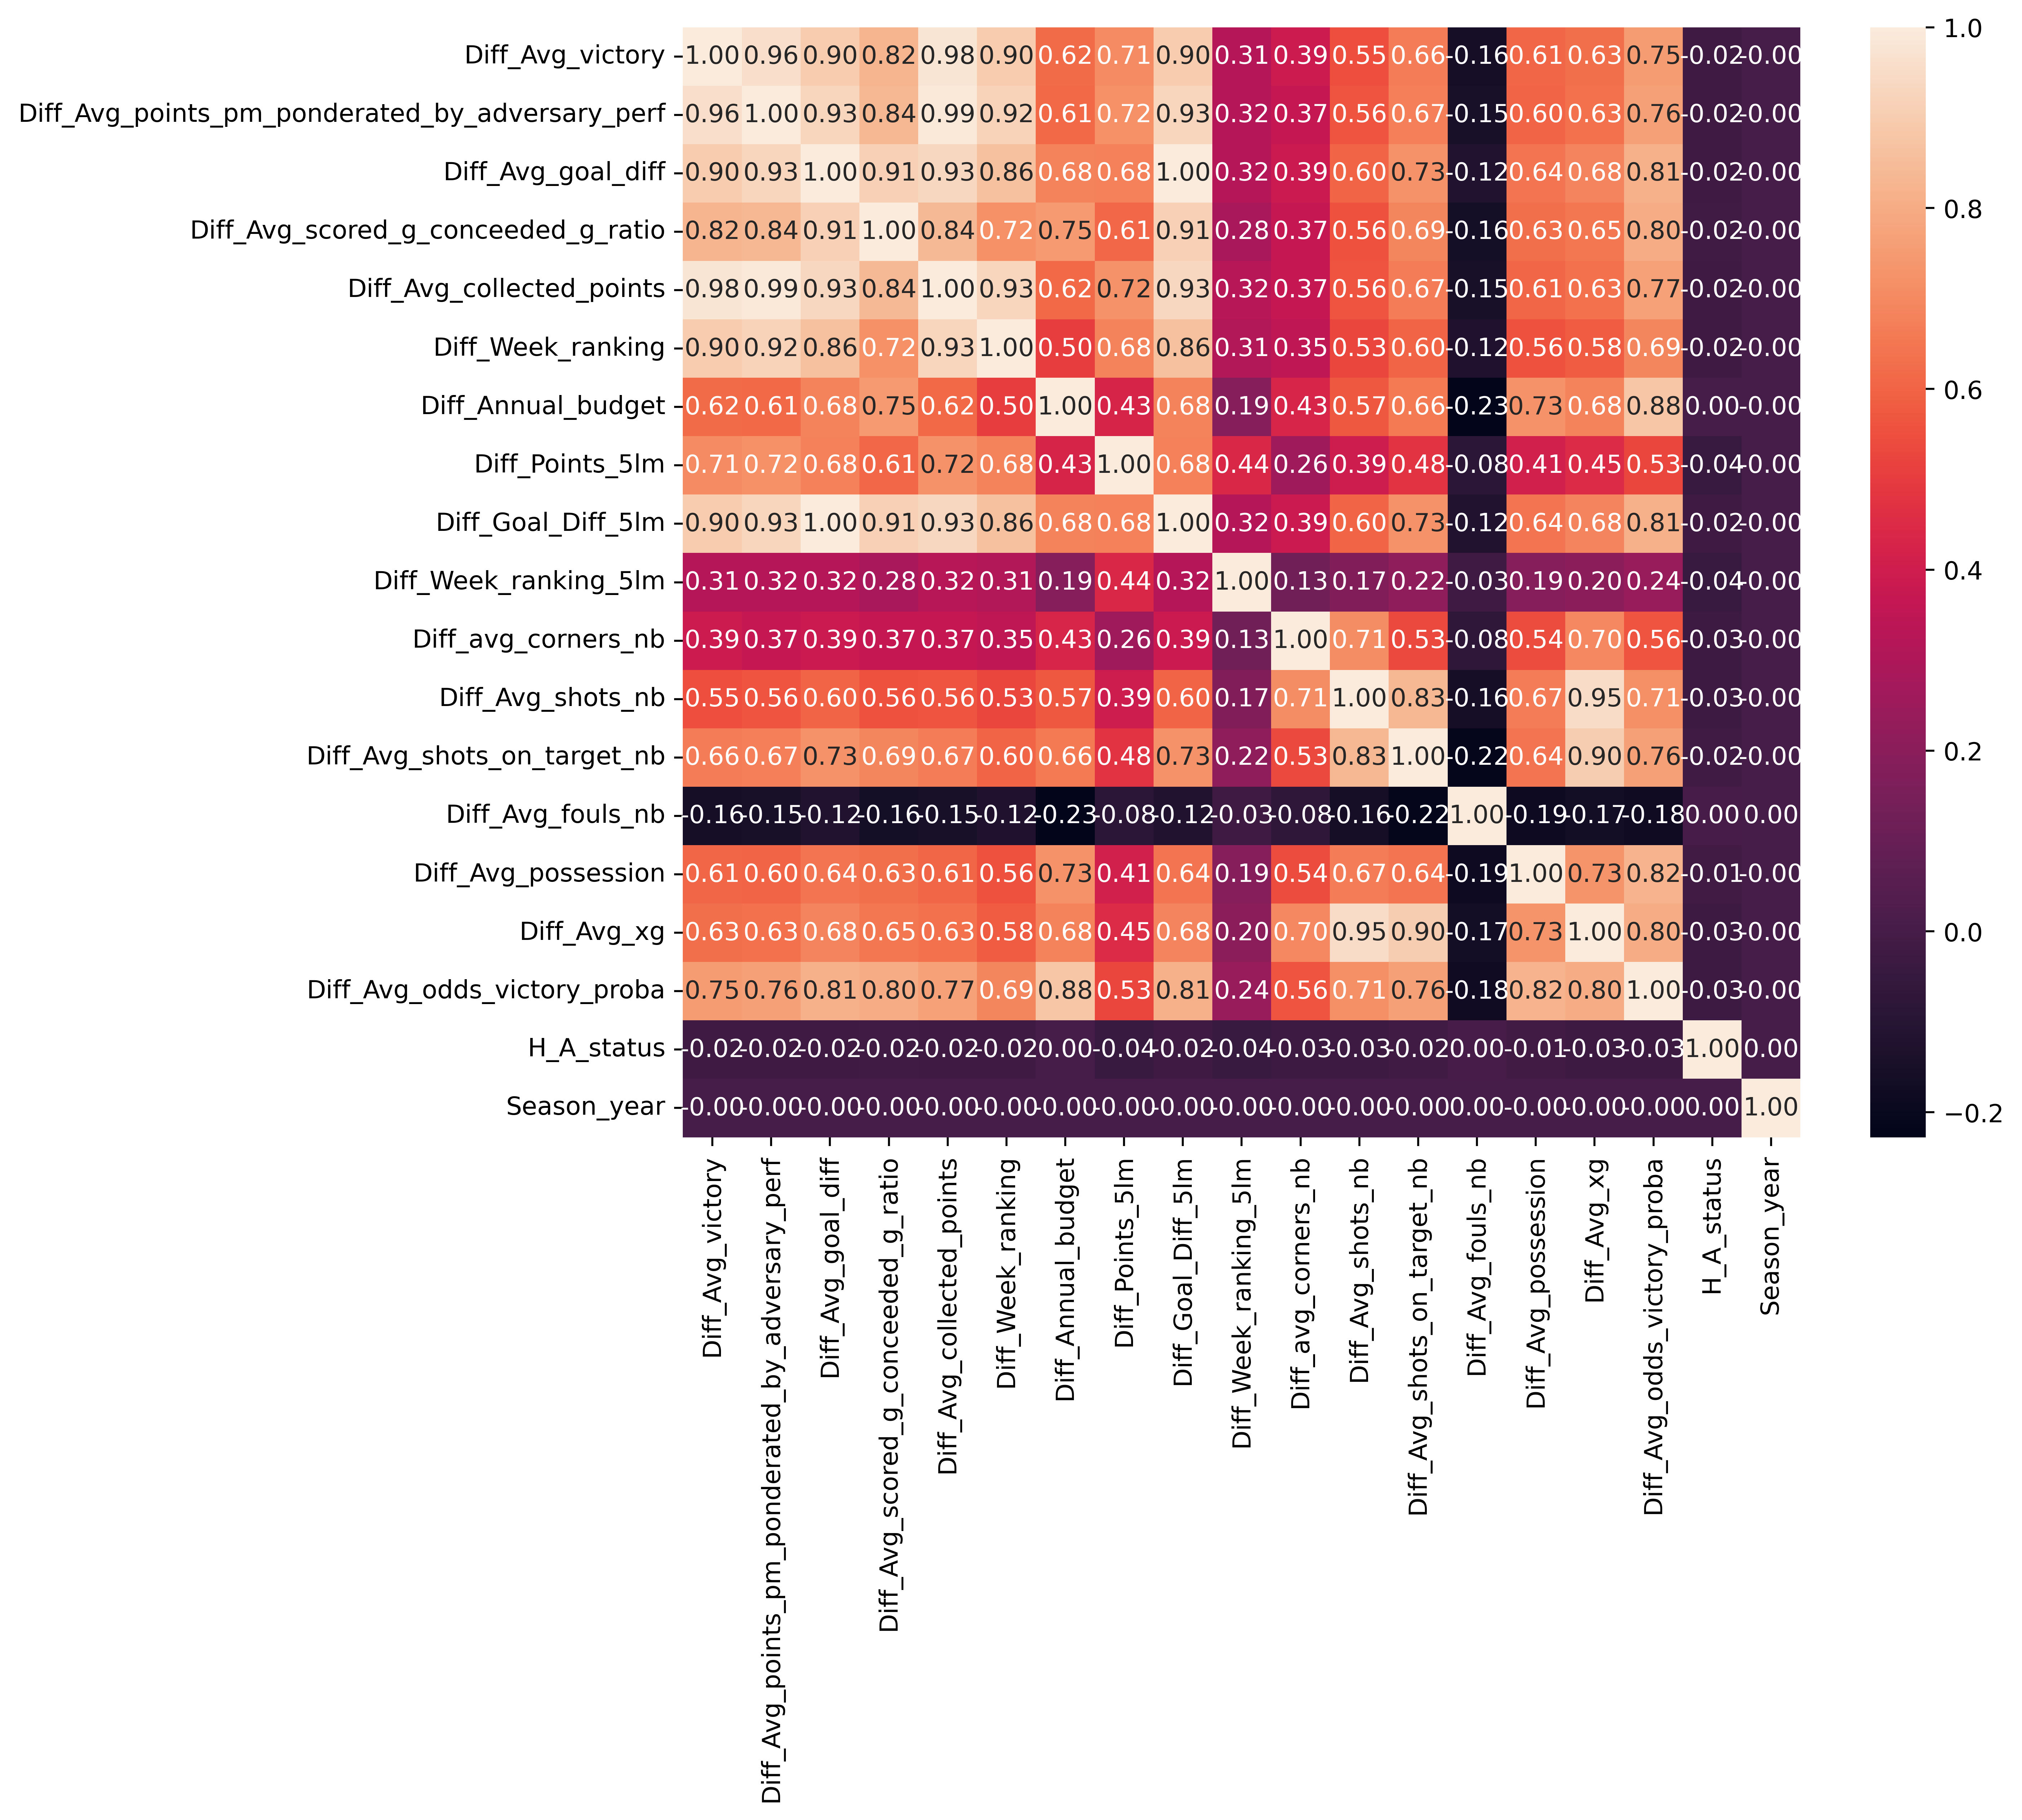

In [9]:
#src.visualization.visualize

visualize.heat_map(dataset_restricted_2.copy())